In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/KULIAH/PROGRAM/prepo_1.xlsx')
df.head(5)

,Unnamed: 0,Text,Id,tweet_tokens,tweet_tokens_fdist,tweet_tokens_WSW,tweet_normalized,tweet_tokens_stemmed
0,0,rt senilai rp miliar berhasil disita bareskrim...,1.461846e+18,"['rt', 'senilai', 'rp', 'miliar', 'berhasil', ...",<FreqDist with 17 samples and 17 outcomes>,"['senilai', 'rp', 'miliar', 'berhasil', 'disit...","['senilai', 'rp', 'miliar', 'berhasil', 'disit...","['nila', 'rp', 'miliar', 'hasil', 'sita', 'bar..."
1,1,rt bagaikan mati satu tumbuh seribu pinjol ill...,1.461846e+18,"['rt', 'bagaikan', 'mati', 'satu', 'tumbuh', '...",<FreqDist with 17 samples and 18 outcomes>,"['mati', 'tumbuh', 'seribu', 'pinjol', 'illega...","['mati', 'tumbuh', 'seribu', 'pinjol', 'illega...","['mati', 'tumbuh', 'ribu', 'pinjol', 'illegal'..."
2,2,rt dittipideksus bareskrim polri akan mengenak...,1.461846e+18,"['rt', 'dittipideksus', 'bareskrim', 'polri', ...",<FreqDist with 18 samples and 18 outcomes>,"['dittipideksus', 'bareskrim', 'polri', 'menge...","['dittipideksus', 'bareskrim', 'polri', 'menge...","['dittipideksus', 'bareskrim', 'polri', 'kena'..."
3,3,rt uwooowwternyata kilang minyak yg terbakar k...,1.461844e+18,"['rt', 'uwooowwternyata', 'kilang', 'minyak', ...",<FreqDist with 16 samples and 16 outcomes>,"['uwooowwternyata', 'kilang', 'minyak', 'terba...","['uwooowwternyata', 'kilang', 'minyak', 'terba...","['uwooowwternyata', 'kilang', 'minyak', 'bakar..."
4,4,ini daftar pinjol ilegal yang sudah disapu ber...,1.461843e+18,"['ini', 'daftar', 'pinjol', 'ilegal', 'yang', ...",<FreqDist with 9 samples and 9 outcomes>,"['daftar', 'pinjol', 'ilegal', 'disapu', 'bers...","['daftar', 'pinjol', 'ilegal', 'disapu', 'bers...","['daftar', 'pinjol', 'ilegal', 'sapu', 'bersih..."


In [ ]:
dtf = pd.DataFrame(df)
dtf

,Unnamed: 0,Text,Id,tweet_tokens,tweet_tokens_fdist,tweet_tokens_WSW,tweet_normalized,tweet_tokens_stemmed
0,0,rt senilai rp miliar berhasil disita bareskrim...,1.461846e+18,"['rt', 'senilai', 'rp', 'miliar', 'berhasil', ...",<FreqDist with 17 samples and 17 outcomes>,"['senilai', 'rp', 'miliar', 'berhasil', 'disit...","['senilai', 'rp', 'miliar', 'berhasil', 'disit...","['nila', 'rp', 'miliar', 'hasil', 'sita', 'bar..."
1,1,rt bagaikan mati satu tumbuh seribu pinjol ill...,1.461846e+18,"['rt', 'bagaikan', 'mati', 'satu', 'tumbuh', '...",<FreqDist with 17 samples and 18 outcomes>,"['mati', 'tumbuh', 'seribu', 'pinjol', 'illega...","['mati', 'tumbuh', 'seribu', 'pinjol', 'illega...","['mati', 'tumbuh', 'ribu', 'pinjol', 'illegal'..."
2,2,rt dittipideksus bareskrim polri akan mengenak...,1.461846e+18,"['rt', 'dittipideksus', 'bareskrim', 'polri', ...",<FreqDist with 18 samples and 18 outcomes>,"['dittipideksus', 'bareskrim', 'polri', 'menge...","['dittipideksus', 'bareskrim', 'polri', 'menge...","['dittipideksus', 'bareskrim', 'polri', 'kena'..."
3,3,rt uwooowwternyata kilang minyak yg terbakar k...,1.461844e+18,"['rt', 'uwooowwternyata', 'kilang', 'minyak', ...",<FreqDist with 16 samples and 16 outcomes>,"['uwooowwternyata', 'kilang', 'minyak', 'terba...","['uwooowwternyata', 'kilang', 'minyak', 'terba...","['uwooowwternyata', 'kilang', 'minyak', 'bakar..."
4,4,ini daftar pinjol ilegal yang sudah disapu ber...,1.461843e+18,"['ini', 'daftar', 'pinjol', 'ilegal', 'yang', ...",<FreqDist with 9 samples and 9 outcomes>,"['daftar', 'pinjol', 'ilegal', 'disapu', 'bers...","['daftar', 'pinjol', 'ilegal', 'disapu', 'bers...","['daftar', 'pinjol', 'ilegal', 'sapu', 'bersih..."
...,...,...,...,...,...,...,...,...
6902,6902,pinjol fc,1.459867e+18,"['pinjol', 'fc']",<FreqDist with 2 samples and 2 outcomes>,"['pinjol', 'fc']","['pinjol', 'fc']","['pinjol', 'fc']"
6903,6903,yang terakhir diteror pinjol,1.459866e+18,"['yang', 'terakhir', 'diteror', 'pinjol']",<FreqDist with 4 samples and 4 outcomes>,"['diteror', 'pinjol']","['diteror', 'pinjol']","['teror', 'pinjol']"
6904,6904,bangsa yg begini mendapat prioritas di hati lo...,1.459865e+18,"['bangsa', 'yg', 'begini', 'mendapat', 'priori...",<FreqDist with 31 samples and 34 outcomes>,"['bangsa', 'prioritas', 'hati', 'lord', 'pemer...","['bangsa', 'prioritas', 'hati', 'lord', 'pemer...","['bangsa', 'prioritas', 'hati', 'lord', 'perin..."
6905,6905,alter aku pinjol mboan modal off ni wakakakaa,1.459864e+18,"['alter', 'aku', 'pinjol', 'mboan', 'modal', '...",<FreqDist with 8 samples and 8 outcomes>,"['alter', 'pinjol', 'mboan', 'modal', 'off', '...","['alter', 'pinjol', 'mboan', 'modal', 'off', '...","['alter', 'pinjol', 'mboan', 'modal', 'off', '..."


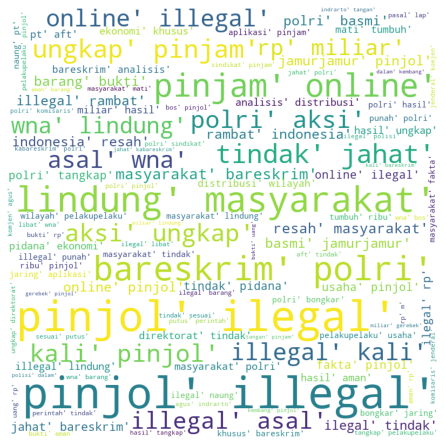

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

comment_words = ''
stopwords = ''

for val in df['tweet_tokens_stemmed']:
  # typecaste each val to string
  val = str(val)

  # split the value
  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  
  comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width=800, height=800,
                      background_color = "white", stopwords = stopwords,
                      min_font_size = 10).generate(comment_words)

plt.figure(figsize=(8,6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
df.isnull().sum()

Unnamed: 0              0
Text                    8
Id                      0
tweet_tokens            0
tweet_tokens_fdist      0
tweet_tokens_WSW        0
tweet_normalized        0
tweet_tokens_stemmed    0
dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
vectorizer = CountVectorizer()
tf_transformer = TfidfTransformer()

datavector = vectorizer.fit_transform(df['tweet_tokens_stemmed'])
datatfidf = tf_transformer.fit_transform(datavector)
datavector.shape

(6907, 6220)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(datatfidf)
hasil = kmeans.labels_
len(hasil)

6907

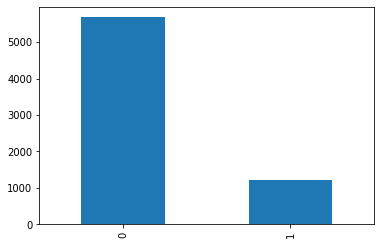

In [ ]:
hist = pd.value_counts(hasil)
hist.plot(kind='bar')

In [ ]:
df['Cluster'] = hasil
print(df.shape)
df.head(5)

(6907, 9)


,Unnamed: 0,Text,Id,tweet_tokens,tweet_tokens_fdist,tweet_tokens_WSW,tweet_normalized,tweet_tokens_stemmed,Cluster
0,0,rt senilai rp miliar berhasil disita bareskrim...,1.461846e+18,"['rt', 'senilai', 'rp', 'miliar', 'berhasil', ...",<FreqDist with 17 samples and 17 outcomes>,"['senilai', 'rp', 'miliar', 'berhasil', 'disit...","['senilai', 'rp', 'miliar', 'berhasil', 'disit...","['nila', 'rp', 'miliar', 'hasil', 'sita', 'bar...",0
1,1,rt bagaikan mati satu tumbuh seribu pinjol ill...,1.461846e+18,"['rt', 'bagaikan', 'mati', 'satu', 'tumbuh', '...",<FreqDist with 17 samples and 18 outcomes>,"['mati', 'tumbuh', 'seribu', 'pinjol', 'illega...","['mati', 'tumbuh', 'seribu', 'pinjol', 'illega...","['mati', 'tumbuh', 'ribu', 'pinjol', 'illegal'...",0
2,2,rt dittipideksus bareskrim polri akan mengenak...,1.461846e+18,"['rt', 'dittipideksus', 'bareskrim', 'polri', ...",<FreqDist with 18 samples and 18 outcomes>,"['dittipideksus', 'bareskrim', 'polri', 'menge...","['dittipideksus', 'bareskrim', 'polri', 'menge...","['dittipideksus', 'bareskrim', 'polri', 'kena'...",0
3,3,rt uwooowwternyata kilang minyak yg terbakar k...,1.461844e+18,"['rt', 'uwooowwternyata', 'kilang', 'minyak', ...",<FreqDist with 16 samples and 16 outcomes>,"['uwooowwternyata', 'kilang', 'minyak', 'terba...","['uwooowwternyata', 'kilang', 'minyak', 'terba...","['uwooowwternyata', 'kilang', 'minyak', 'bakar...",0
4,4,ini daftar pinjol ilegal yang sudah disapu ber...,1.461843e+18,"['ini', 'daftar', 'pinjol', 'ilegal', 'yang', ...",<FreqDist with 9 samples and 9 outcomes>,"['daftar', 'pinjol', 'ilegal', 'disapu', 'bers...","['daftar', 'pinjol', 'ilegal', 'disapu', 'bers...","['daftar', 'pinjol', 'ilegal', 'sapu', 'bersih...",0


In [ ]:
df['Cluster'].value_counts()

0    5677
1    1230
Name: Cluster, dtype: int64

In [ ]:
kelas_0 = df[df.Cluster==0]
kelas_1 = df[df.Cluster==1]

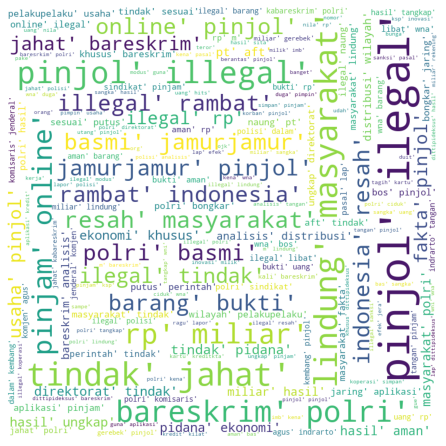

In [ ]:
# CLUSTER NEGATIF (0)

from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = ''

for val in kelas_0['tweet_tokens_stemmed']:
  # typecaste each val to string
  val = str(val)

  # split the value
  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  
  comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width=800, height=800,
                      background_color = "white", stopwords = stopwords,
                      min_font_size = 10).generate(comment_words)

plt.figure(figsize=(8,6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

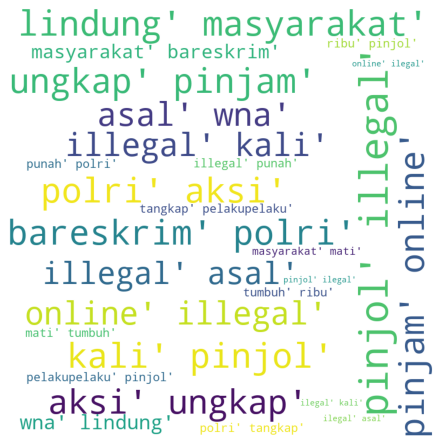

In [ ]:
# CLUSTER POSITIF (1)

from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = ''

for val in kelas_1['tweet_tokens_stemmed']:
  # typecaste each val to string
  val = str(val)

  # split the value
  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  
  comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width=800, height=800,
                      background_color = "white", stopwords = stopwords,
                      min_font_size = 10).generate(comment_words)

plt.figure(figsize=(8,6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
df.to_excel('Clustering_KMeans.xlsx')

In [ ]:
from google.colab import files
files.download('Clustering_KMeans.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>